In [1]:
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

dataset_root = './dataset/'
raw_data = [f_name for f_name in listdir(dataset_root) if isfile(join(dataset_root, f_name)) and 'nii' in f_name]
raw_data = [nib.load(dataset_root + path).get_data() for path in raw_data]

In [2]:
len_min = min([data.shape[-1] for data in raw_data])
len_max = max([data.shape[-1] for data in raw_data])

T1_dataset = []
for data in raw_data:
    len_diff = data.shape[-1] - len_min
    start = int(len_diff/2)
    end = int(data.shape[-1] - len_diff/2)
    data = data.transpose(2,0,1)[np.newaxis, start:end]
    T1_dataset.append(data)
    
T1_dataset = np.concatenate(T1_dataset)

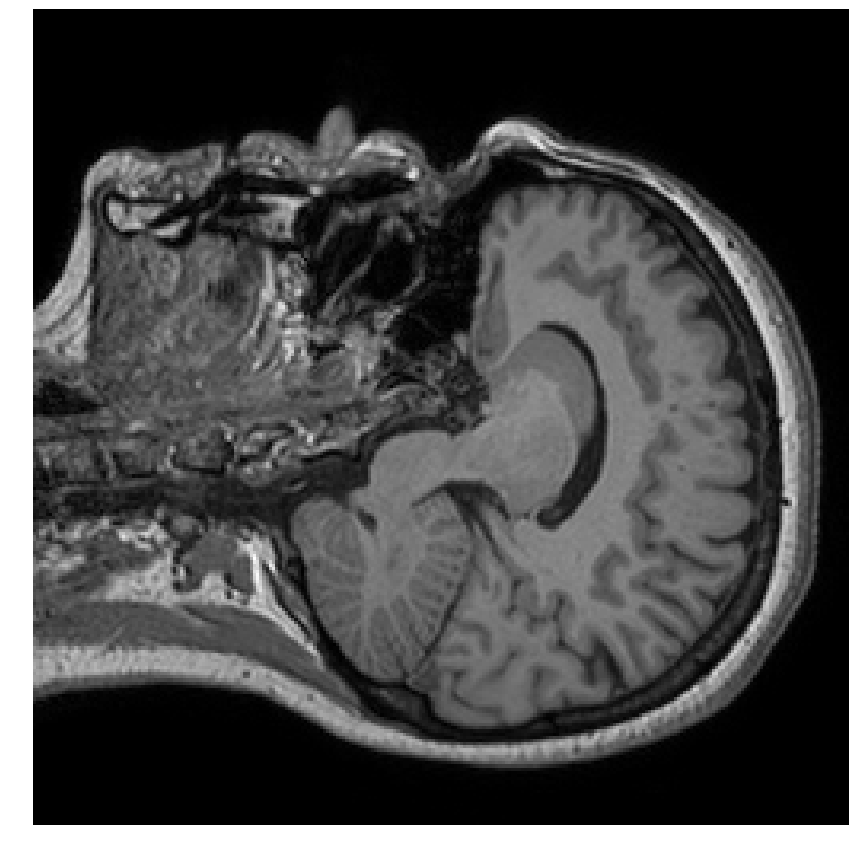

In [3]:
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(T1_dataset[9,73], cmap='gray')
plt.axis('off')
plt.show()